# Project Goal: What attributes lead to best value university? 

# Steps: 

## 1) Define value metrics
#### Potentially:
1) high employment rate for grads n years after graduation <br>
2) high salary for grads n years after graduation (MN_EARN_WNE_P7 and/or MN_EARN_WNE_P9) - measured on previous cohort <br>
3) low debt (LO_INC_DEBT_MDN, MD_INC_DEBT_MDN, HI_INC_DEBT_MDN) or First Gen v. Not First Gen (FIRST_GEN_DEBT_MDN, NOTFIRSTGEN_DEBT_MDN)  <br>
4) debt default rate at 2 years or 3 years out (CDR2 & CDR3) <br> 
5) high completion percentage C150_4 (Also completion rates for different racial subgroups) <br> 
6) serves many first gen students (FIRST_GEN) <br>
7) Percentage completing within 4, 8 years at the original institution (COMP_ORIG_YR4_RT, COMP_ORIG_YR8_RT)

## 2) Control variables
#### Potentially: 
1) Baseline of incoming students <br>
    a) selectivity: ADM_RATE_ALL <br> 
    b) SAT scores: medians (SATVRMID & SATMTMID); means SAT_AVG_ALL - note: many nulls <br> 
2) Types of degrees awarded (percentage of technical degrees v arts type degrees
    a) PCIP 01, 03-05, 09-16, 19, 22-31, 38-52, 54<br> 
3) Geography? <br> 
4) Other student demographics? (family income? first year student) 

## 3) Variables of interest: 
#### Potentially: 
1) State or Region? (STABBR or REGION) <br> 
2) Public/Private Non-Profit/Private For-Profit (CONTROL) <br> 
3) Avg Cost Overall - AVGCOSTT4_A <br> 
4) Net Revenue per FT student - TUITFTE <br> 
5) Instruction Expenditures per Ft student - INEXPFTE


## 4) Other Limitations
#### Potentially: 
1) limit to Bachelors degrees 


## 5) Identify techniques
#### Potentially: 
1) Regressions <br> 
2) Clusters/Classifiers? - id which schools perform like schools in a different category <br> 
3) PCA? - probably not interpretable enough for our purposes 

## 6) Results?? 

In [2]:
import os, sys
import pandas as pd
import zipfile as zf
import requests

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import cluster
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
import urllib
import itertools
import pylab as pl
import seaborn as sns

from __future__ import division

% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
try:
    df_2010 = pd.read_csv('Data/CollegeScorecard_Raw_Data/MERGED2010_11_PP.csv')
#If data not already downloaded, trigger download:
except: 
    url = 'https://ed-public-download.apps.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip'
    file_name = url.split('/')[-1]
    r = requests.get(url)
    with open(file_name, "wb") as code:
        code.write(r.content)
    zipref = zf.ZipFile(file_name, 'r')
    zipref.extractall('Data')
    zipref.close()
    try:
        df_2010 = pd.read_csv('Data\\CollegeScorecard_Raw_Data\\MERGED2010_11_PP.csv')
    except(IOError):
        df_2010 = pd.read_csv('Data/CollegeScorecard_Raw_Data/MERGED2010_11_PP.csv')

/Users/shay/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,6,1461,1561,1729) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
# predict likelihood of default based on other metrics

In [46]:
varlist = ['CDR2', 'MN_EARN_WNE_P7', 'MN_EARN_WNE_P9', 'LO_INC_DEBT_MDN', 'MD_INC_DEBT_MDN', 'HI_INC_DEBT_MDN',
          'FIRST_GEN', 'COMP_ORIG_YR4_RT', 'ADM_RATE_ALL', 'AGE_ENTRY', 'INEXPFTE', 'CONTROL']

In [47]:
smaller = df_2010[varlist]

In [48]:
smaller.head()

,CDR2,MN_EARN_WNE_P7,MN_EARN_WNE_P9,LO_INC_DEBT_MDN,MD_INC_DEBT_MDN,HI_INC_DEBT_MDN,FIRST_GEN,COMP_ORIG_YR4_RT,ADM_RATE_ALL,AGE_ENTRY,INEXPFTE,CONTROL
0,0.095,29600,33800,12775,12000,11000,0.3920704846,0.2295472597,0.5129,21.010806638,6601.0,1
1,0.037,40000,44500,11150,9663,7905,0.3494533221,0.3912454874,0.8243,23.643483343,16090.0,1
2,0.085,38700,42400,9500,12500,11269,0.5153583618,0.3764705882,0.7143,32.828908555,4879.0,2
3,0.037,43400,50200,11727.5,11000,8750,0.3242659758,0.3500948767,0.6614,23.933037515,8379.0,1
4,0.148,25200,29400,9250,9500,9500,0.4296134209,0.0931315483,0.4372,20.909669211,7386.0,1


In [35]:
from sklearn.cluster import KMeans

In [49]:
smaller = smaller.convert_objects(convert_numeric = True)

/Users/shay/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [50]:
smallest = smaller.dropna()

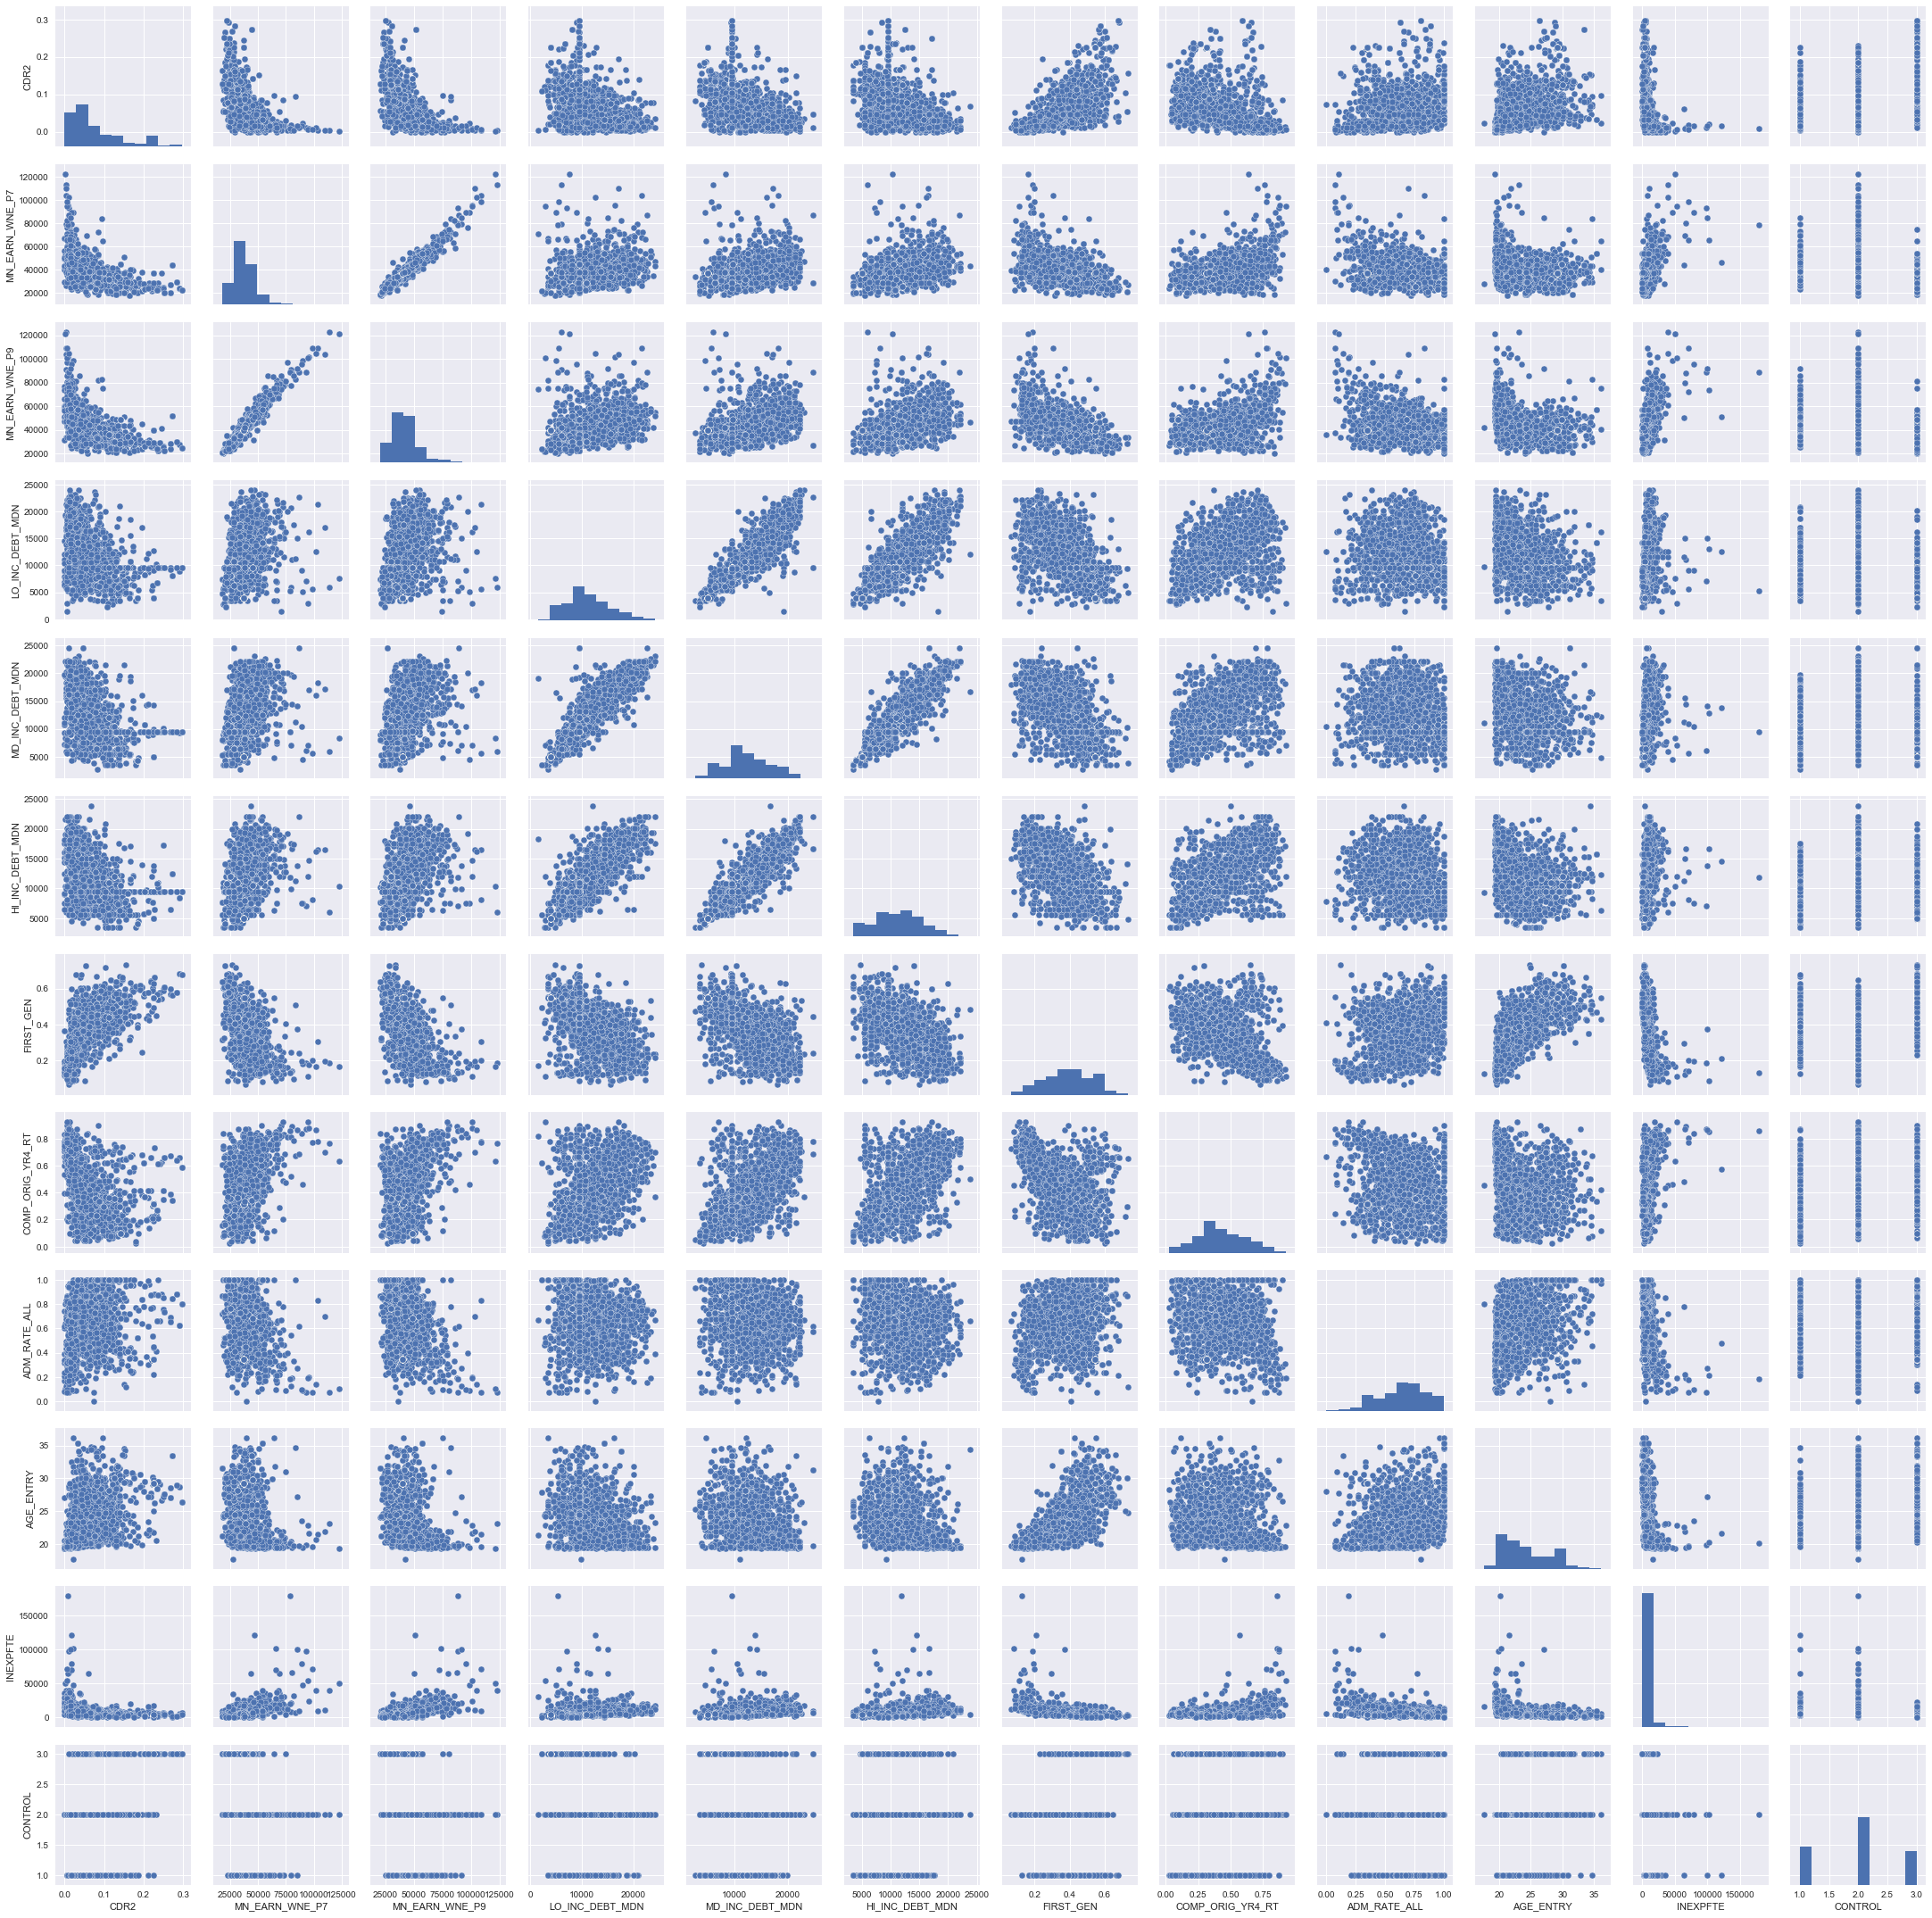

In [51]:
sns.pairplot(smallest)

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

In [85]:
control_dummies = pd.get_dummies(smallest.CONTROL)

In [152]:
y = smallest.CDR2
x = smallest.iloc[:, 1:-1]
x = x.join(control_dummies)

randfor = RandomForestRegressor(oob_score = True, max_features = 5, max_depth = 5)

In [153]:
fitted = randfor.fit(x, y)

In [154]:
testy = fitted.predict(x)

In [155]:
fitted.feature_importances_

array([ 0.02986855,  0.03939954,  0.0644065 ,  0.11659399,  0.03066022,
        0.34394538,  0.05663327,  0.03136532,  0.08886602,  0.02224389,
        0.        ,  0.00386326,  0.17215406])

In [161]:
from sklearn.model_selection import train_test_split

In [158]:
from sklearn.metrics import r2_score

In [205]:
def limitdf(df, varlist, dummies = 0): 
    '''Takes dataframe, list of variables of interest 
    and list of variables to turn into dummies and returns
    clean dataframe
    '''
    
    smaller = df[varlist]
    smaller = smaller.convert_objects(convert_numeric = True)
    smallest = smaller.dropna()
    if dummies != 0: 
        for var in dummies: 
            controldums = pd.get_dummies(df[var])
            smallest = smallest.join(controldums)
            smallest.drop(var, inplace = True, axis = 1)
    return smallest

In [282]:
def testmodel(df, yvar): 
    y = df[yvar]
    x = df.drop(yvar, axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
    randfor = RandomForestRegressor(oob_score = True, max_features = 'sqrt', max_depth = 5)
    fitted = randfor.fit(X_train, y_train)
    ypred = fitted.predict(X_test)
    ypred_is = fitted.predict(X_train)
    print 'Insample: {0}, OutSample: {1}'.format(fitted.score(X_train, y_train), fitted.score(X_test, y_test))
    print 'Feature Importance'
    for i, feature in enumerate(X_train.columns):
        print feature, round(fitted.feature_importances_[i], 3)

In [303]:
# Some Classifiers

In [283]:
# debt default as function of earnings, debt, % first gen, % completing in 4 years, Selectivity, Age, $$ spent on 
# education and whether public, private or not
testmodel(limitdf(df_2010, varlist, ['CONTROL']), 'CDR2')

/Users/shay/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Insample: 0.836804154395, OutSample: 0.792496695336
Feature Importance
MN_EARN_WNE_P7 0.081
MN_EARN_WNE_P9 0.059
LO_INC_DEBT_MDN 0.157
MD_INC_DEBT_MDN 0.112
HI_INC_DEBT_MDN 0.065
FIRST_GEN 0.237
COMP_ORIG_YR4_RT 0.023
ADM_RATE_ALL 0.022
AGE_ENTRY 0.027
INEXPFTE 0.022
1 0.0
2 0.032
3 0.162


In [284]:
varlistsm = ['CDR2', 'LO_INC_DEBT_MDN', 'MD_INC_DEBT_MDN', 'HI_INC_DEBT_MDN']
testmodel(limitdf(df_2010, varlistsm), 'CDR2')

/Users/shay/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Insample: 0.437791456513, OutSample: 0.398666301887
Feature Importance
LO_INC_DEBT_MDN 0.48
MD_INC_DEBT_MDN 0.287
HI_INC_DEBT_MDN 0.234


In [287]:
varlistsm2 = ['CDR2', 'FIRST_GEN', 'AGE_ENTRY', 'CONTROL']
testmodel(limitdf(df_2010, varlistsm2, ['CONTROL']), 'CDR2')

/Users/shay/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Insample: 0.328653522895, OutSample: 0.325874597592
Feature Importance
FIRST_GEN 0.539
AGE_ENTRY 0.212
1 0.017
2 0.02
3 0.212


In [277]:
testmodel(limitdf(df_2010, varlist2, ['CONTROL']), 'CDR2')

/Users/shay/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Insample: 0.618905109458, OutSample: 0.592132965615
Feature Importance
MN_EARN_WNE_P7 0.111
LO_INC_DEBT_MDN 0.176
MD_INC_DEBT_MDN 0.144
HI_INC_DEBT_MDN 0.03
COMP_ORIG_YR4_RT 0.086
AGE_ENTRY 0.118
INEXPFTE 0.141
1 0.0
2 0.038
3 0.155


In [278]:
degreetype = list(df_2010.columns[df_2010.columns.str.contains('PCIP')])

In [279]:
varlist3 = ['CDR2', 'MN_EARN_WNE_P7'] + degreetype

In [280]:
testmodel(limitdf(df_2010, varlist3), 'CDR2')

/Users/shay/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Insample: 0.262252521991, OutSample: 0.229972982647
Feature Importance
MN_EARN_WNE_P7 0.031
PCIP01 0.005
PCIP03 0.005
PCIP04 0.003
PCIP05 0.006
PCIP09 0.001
PCIP10 0.01
PCIP11 0.065
PCIP12 0.035
PCIP13 0.026
PCIP14 0.002
PCIP15 0.087
PCIP16 0.099
PCIP19 0.003
PCIP22 0.008
PCIP23 0.054
PCIP24 0.024
PCIP25 0.0
PCIP26 0.066
PCIP27 0.002
PCIP29 0.0
PCIP30 0.0
PCIP31 0.001
PCIP38 0.088
PCIP39 0.003
PCIP40 0.002
PCIP41 0.002
PCIP42 0.085
PCIP43 0.044
PCIP44 0.005
PCIP45 0.013
PCIP46 0.02
PCIP47 0.002
PCIP48 0.009
PCIP49 0.002
PCIP50 0.004
PCIP51 0.049
PCIP52 0.023
PCIP54 0.115


In [249]:
varlist4 = ['FIRST_GEN', 'LO_INC_DEBT_MDN', 'MD_INC_DEBT_MDN', 'HI_INC_DEBT_MDN', 'FIRSTGEN_DEBT_MDN', 
            'NOTFIRSTGEN_DEBT_MDN', 'INEXPFTE']

In [264]:
testmodel(limitdf(df_2010, varlist4), 'FIRST_GEN')

/Users/shay/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Insample: 0.653038067321, OutSample: 0.616461994335
Feature Importance
LO_INC_DEBT_MDN 0.141
MD_INC_DEBT_MDN 0.016
HI_INC_DEBT_MDN 0.027
FIRSTGEN_DEBT_MDN 0.068
NOTFIRSTGEN_DEBT_MDN 0.397
INEXPFTE 0.352


In [288]:
varlist5 = ['MN_EARN_WNE_P7', 'INEXPFTE', 'COMP_ORIG_YR4_RT', 'COMP_ORIG_YR8_RT']

In [289]:
testmodel(limitdf(df_2010, varlist5), 'MN_EARN_WNE_P7')

/Users/shay/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Insample: 0.443291101736, OutSample: 0.36734451809
Feature Importance
INEXPFTE 0.578
COMP_ORIG_YR4_RT 0.246
COMP_ORIG_YR8_RT 0.176


In [301]:
varlist6 = ['COMP_ORIG_YR4_RT', 'INEXPFTE', 'CONTROL', 'ADM_RATE_ALL', 'FIRST_GEN', 'LO_INC_DEBT_MDN',
           'MD_INC_DEBT_MDN', 'HI_INC_DEBT_MDN'] 

In [302]:
testmodel(limitdf(df_2010, varlist6), 'COMP_ORIG_YR4_RT')

/Users/shay/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Insample: 0.562772488551, OutSample: 0.456815530026
Feature Importance
INEXPFTE 0.135
CONTROL 0.039
ADM_RATE_ALL 0.093
FIRST_GEN 0.245
LO_INC_DEBT_MDN 0.082
MD_INC_DEBT_MDN 0.172
HI_INC_DEBT_MDN 0.233
